<h1>Library importation for sound recording</h1>

In [2]:
# Exportation des libraries
import sounddevice as sd
from scipy.io.wavfile import write

<h1> Setup you voice recording with Parameters</h1>
We fistly define the sample rate. generally for human sound the mostly use saple rate is 44100
And we also specify de length of the recording (in second)

In [3]:
#definition des paramettre de l'enregistrement
fs = 44100  # Sample rate : generaly use for human voice
seconds = 3  # Duration of recording

<h1>Voice Recording</h1>
for the voice recording we are use defaut microphone. if your computer don't not have microphone, please install one.
note that we specicy the path of de wav sound. then update that according of your project structure

In [5]:
#this section permit to record sound
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('output.wav', fs, myrecording)  # Save as WAV file
#now the sound is available on output.wav

<h1>Library importation for Speech visualisation</h1>
In this section we use two method to visualise our recorded sound: <b>wave reprensentation</b> and <b>Spectogram representation</b>

In [11]:
#import library for text visualisation
import os
import matplotlib.pyplot as plt
#for loading and visualizing audio files
import librosa
import librosa.display
#to play audio
import IPython.display as ipd

<h2>Load recorded wav file</h2>
we use os package to load all file in specific folder. in our case, the folder contain only one file.
And secondly <b>Librosa package</b> is use to load sound as two parametter. 

In [17]:
audio_fpath = "./datas/recording/"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))
print(audio_clips)

No. of .wav files in audio folder =  1
['output.wav']


In [20]:
x, sr = librosa.load(audio_fpath+audio_clips[0], sr=44100)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(132300,) 44100


<h3>Visualise the sound as a wave</h3>

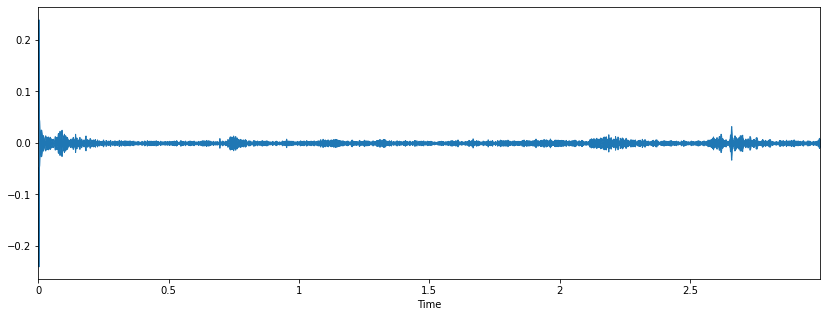

In [21]:
# plot sound
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

<h3>Visualise the sound as a spectogram</h3>

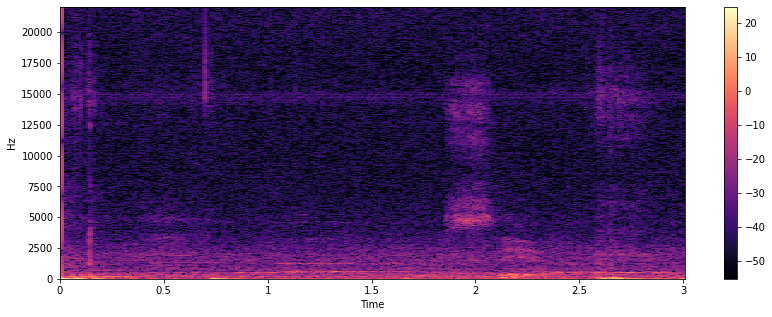

In [22]:
# Converting audio to spectogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

<h3>Visualise the sound as a log spectogram</h3>

c:\users\metroide\pycharmprojects\speech\venv\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\users\metroide\pycharmprojects\speech\venv\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\users\metroide\pycharmprojects\speech\venv\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


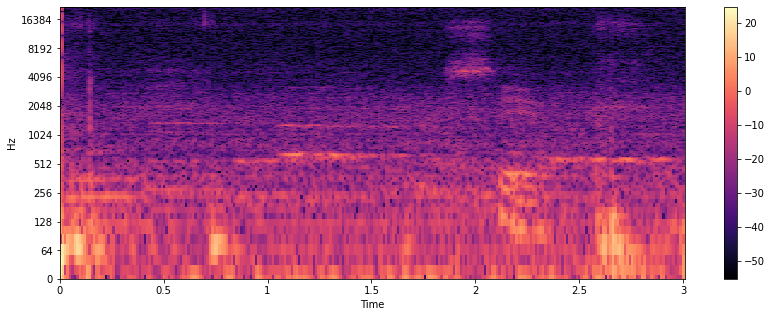

In [23]:
#display with log transformation
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [26]:
#this matrix is the ouput for neurol network on speech recognition task using deep learning
print(Xdb)

[[ 19.880602   12.307627    5.025831  ... -12.965467  -13.443069
    6.8751726]
 [ 22.266777   15.691108  -12.040428  ...  -9.893031   -1.7924588
    7.290845 ]
 [ 24.73831    21.018665   13.724742  ...  -9.869259   -8.459818
    6.6207705]
 ...
 [ -4.3728747 -10.452244  -43.9793    ... -39.336212  -44.996143
  -55.26169  ]
 [ -4.314485  -10.3272915 -44.28289   ... -47.23991   -51.395603
  -44.990456 ]
 [ -4.251262  -10.223189  -55.26169   ... -55.26169   -52.569244
  -43.66993  ]]
